<a href="https://www.kaggle.com/code/aneevinay/amazon-sales-analysis-business-insights?scriptVersionId=257044347" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# introduction

In recent years, e-commerce has grown rapidly, with Amazon remaining at the forefront of this digital revolution. Understanding customer behavior, preferred product categories, and payment trends is crucial for both business strategy and consumer insight. This project presents an exploratory data analysis (EDA) of Amazon's 2025 online order dataset.

The key goals of this analysis are:

* To identify the most ordered product categories or sections.

* To determine the most commonly used payment methods.

By visualizing and interpreting this data, we aim to uncover hidden patterns in consumer behavior that can support better decision-making in retail and marketing.

# Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Data

In [2]:
df=pd.read_csv('/kaggle/input/amazon-sales-2025/amazon_sales_data 2025.csv')

# Check the Data

In [3]:
df.shape

(250, 11)

## Glimpse the Data

In [4]:
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [5]:
df.describe()

,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


## Check missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


There is no missing values

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')

In [8]:
df['Order ID'].duplicated().sum()

0

There is no duplicates in Order ID

# Data Exploration

In [9]:
df.drop('Order ID',axis=1,inplace=True)

## Explore categorical features


 Product value_counts:
Product
Smartphone         35
Smartwatch         34
Running Shoes      27
Headphones         25
Book               25
Laptop             24
Refrigerator       24
T-Shirt            20
Jeans              20
Washing Machine    16
Name: count, dtype: int64


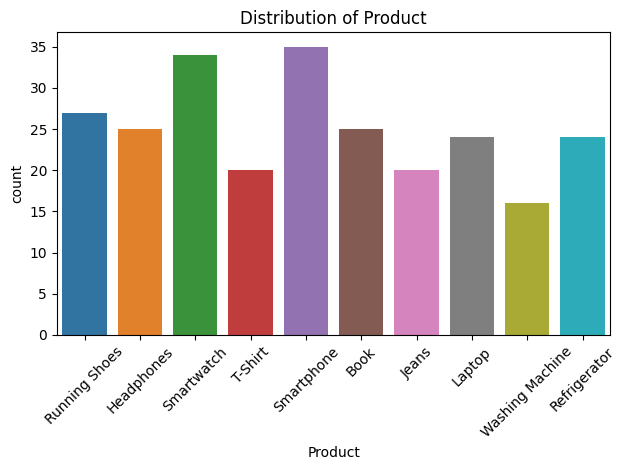


 Category value_counts:
Category
Electronics        118
Clothing            40
Home Appliances     40
Footwear            27
Books               25
Name: count, dtype: int64


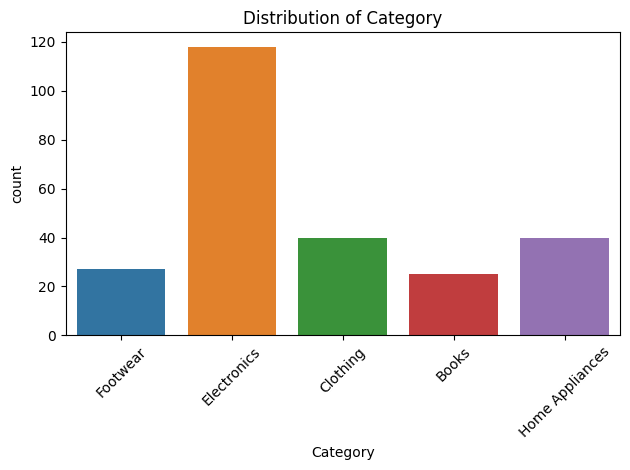


 Customer Name value_counts:
Customer Name
Emma Clark       32
Jane Smith       30
Olivia Wilson    29
John Doe         26
David Lee        26
Michael Brown    24
Daniel Harris    23
Emily Johnson    22
Chris White      22
Sophia Miller    16
Name: count, dtype: int64


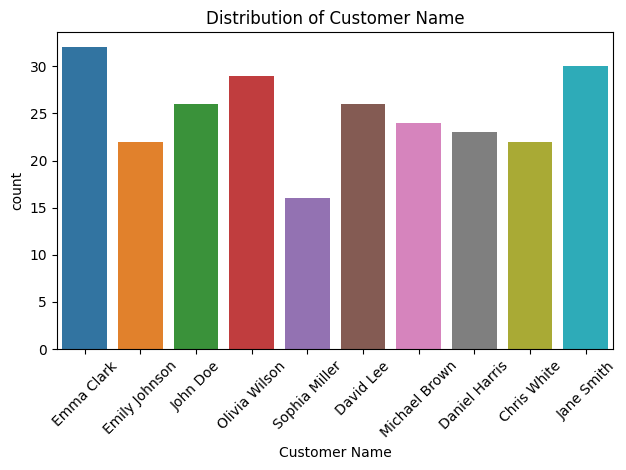


 Customer Location value_counts:
Customer Location
Houston          32
Miami            31
Dallas           29
New York         26
Denver           26
Boston           26
Seattle          22
Chicago          22
San Francisco    19
Los Angeles      17
Name: count, dtype: int64


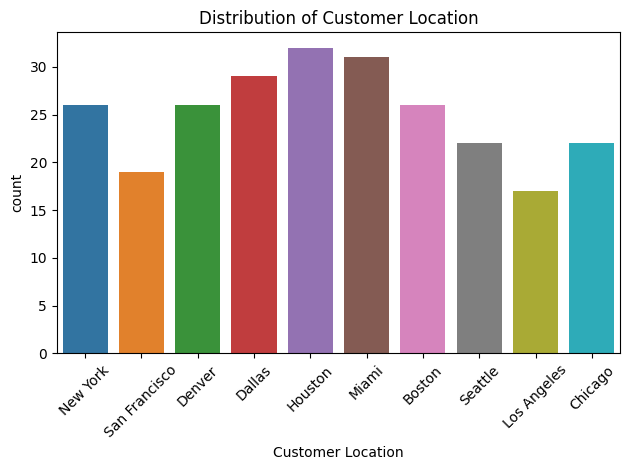


 Payment Method value_counts:
Payment Method
PayPal         60
Credit Card    54
Debit Card     53
Gift Card      42
Amazon Pay     41
Name: count, dtype: int64


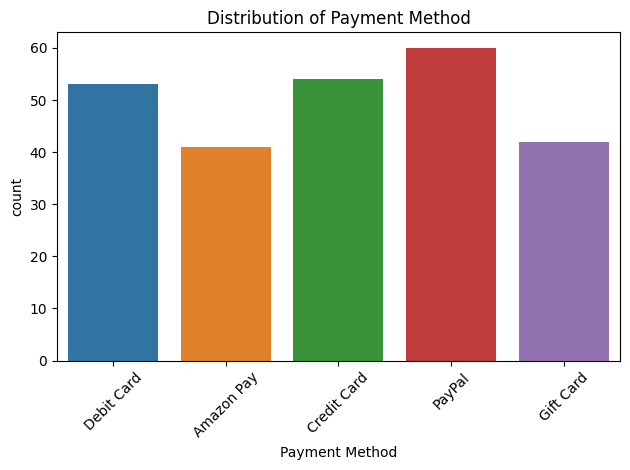


 Status value_counts:
Status
Completed    88
Pending      85
Cancelled    77
Name: count, dtype: int64


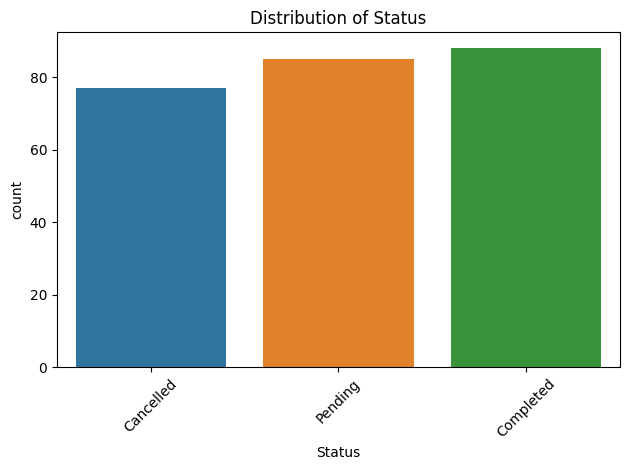

In [10]:
categorical_cols= df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\n {col} value_counts:")
    print(df[col].value_counts())
    sns.countplot(x=col ,data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Analysis based on category

In [11]:
df['Category'].unique()

array(['Footwear', 'Electronics', 'Clothing', 'Books', 'Home Appliances'],
      dtype=object)

## Total sales by category

In [12]:
category_sales = df.groupby('Category')['Total Sales'].sum().reset_index()
category_sales

,Category,Total Sales
0,Books,1035
1,Clothing,3540
2,Electronics,129950
3,Footwear,4320
4,Home Appliances,105000


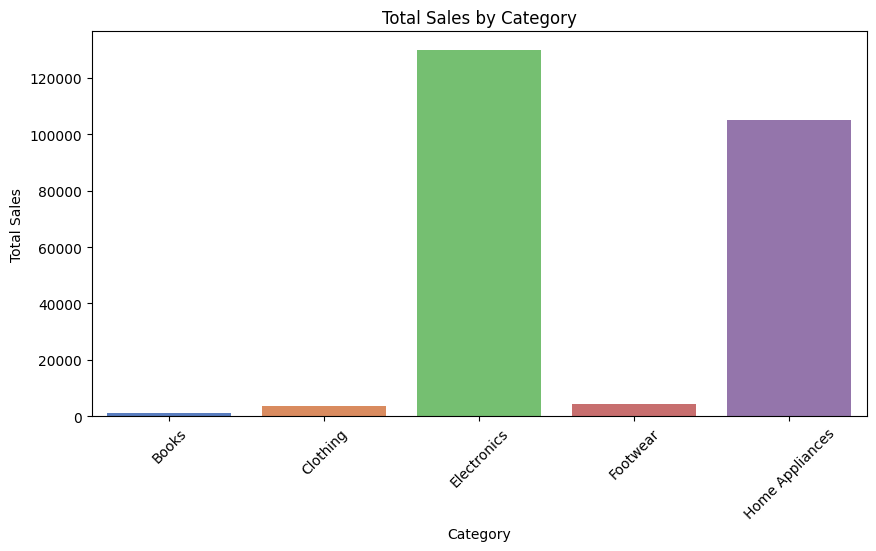

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Total Sales', data=category_sales, palette='muted')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()
plt.savefig('Total_sales_by_category.png')

> From the total sales analysis, we observe that Electronics is the highest revenue-generating category, followed by Home Appliances. On the other hand, Books, Clothing, and Footwear contribute comparatively less to the overall sales.

## Numbers of orders per category

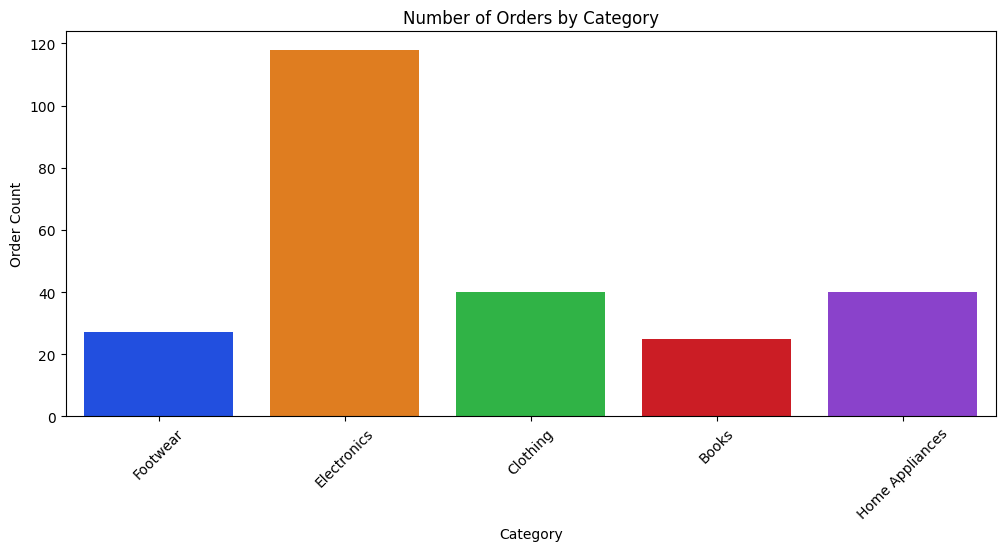

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Category', data=df, palette='bright')
plt.title('Number of Orders by Category')
plt.xlabel('Category')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.show()
plt.savefig('Number_of_orders_by_category.png')

> From the analysis, we can see that the Electronics category has the highest number of sales in online shopping. Now, I would like to analyze which products are trending within the Electronics section.

### Most trending product in electronics

In [15]:
df[df['Category'] == 'Electronics']['Product'].unique()

array(['Headphones', 'Smartwatch', 'Smartphone', 'Laptop'], dtype=object)

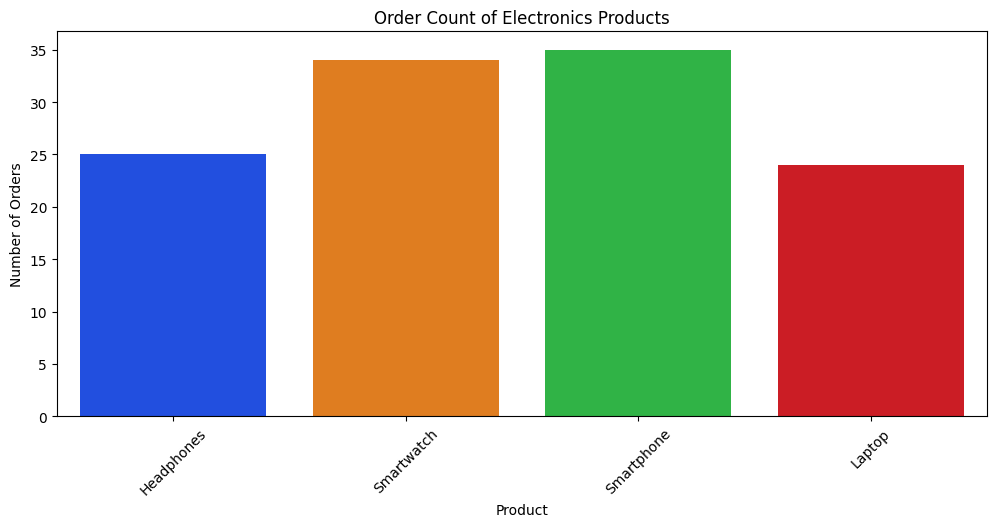

<Figure size 640x480 with 0 Axes>

In [16]:
electronics_df = df[df['Category'] == 'Electronics']

plt.figure(figsize=(12, 5))
sns.countplot(x='Product', data=electronics_df, palette='bright')
plt.title('Order Count of Electronics Products')
plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()
plt.savefig('trending_electronics_products.png')

> From the analysis, we observe that Smartphones and Smartwatches are the most trending products in the Electronics category, with the highest number of orders. Meanwhile, Headphones and Laptops are also popular but slightly less in demand compared to the top two

### most trending product in home appliances

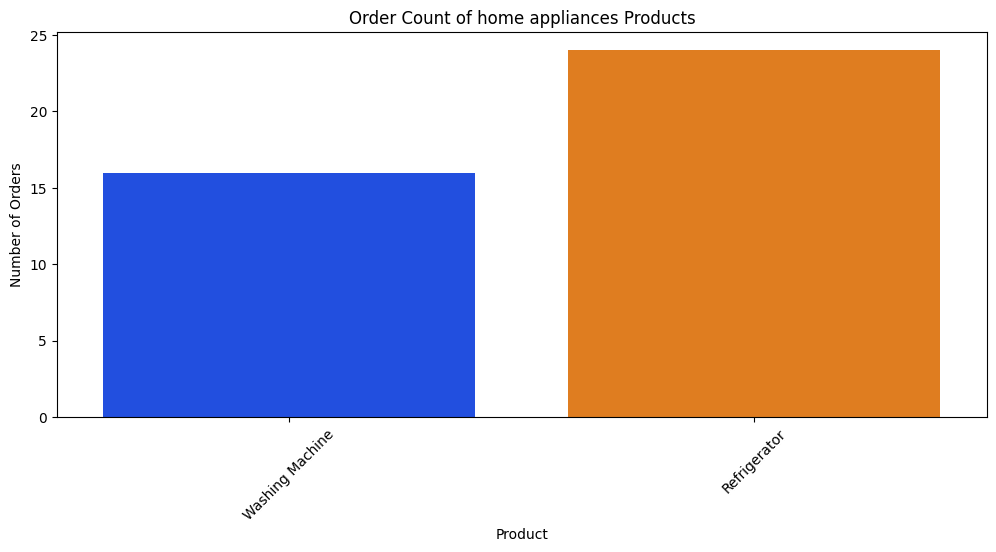

<Figure size 640x480 with 0 Axes>

In [17]:
home_df = df[df['Category'] == 'Home Appliances']

plt.figure(figsize=(12, 5))
sns.countplot(x='Product', data=home_df, palette='bright')
plt.title('Order Count of home appliances Products')
plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()
plt.savefig('trending_home_appliances_products.png')

> From the analysis, we observe that Refrigerators are the most trending product in the Home Appliances category, indicating high customer demand.

# Customer Location Analysis

In [18]:
df['Customer Location'].unique()

array(['New York', 'San Francisco', 'Denver', 'Dallas', 'Houston',
       'Miami', 'Boston', 'Seattle', 'Los Angeles', 'Chicago'],
      dtype=object)

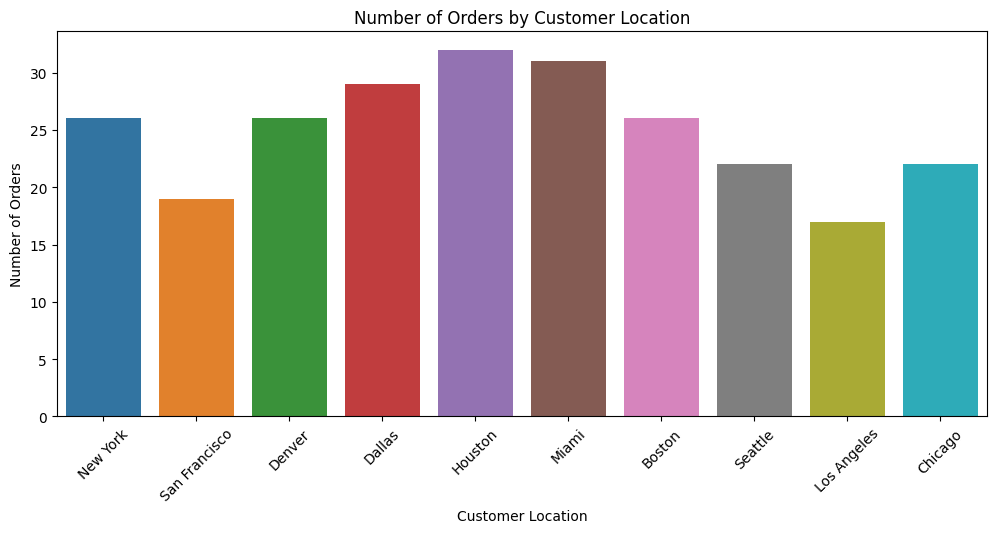

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Customer Location', data=df) 
plt.title('Number of Orders by Customer Location')
plt.xlabel('Customer Location')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()
plt.savefig('orders_by_customer_location.png')

> From the analysis, we can observe that customer orders are relatively higher in Houston and Miami, while Los Angeles and San Francisco have comparatively lower order volumes.

# Payment Method Analysis

In [20]:
df['Payment Method'].unique()

array(['Debit Card', 'Amazon Pay', 'Credit Card', 'PayPal', 'Gift Card'],
      dtype=object)

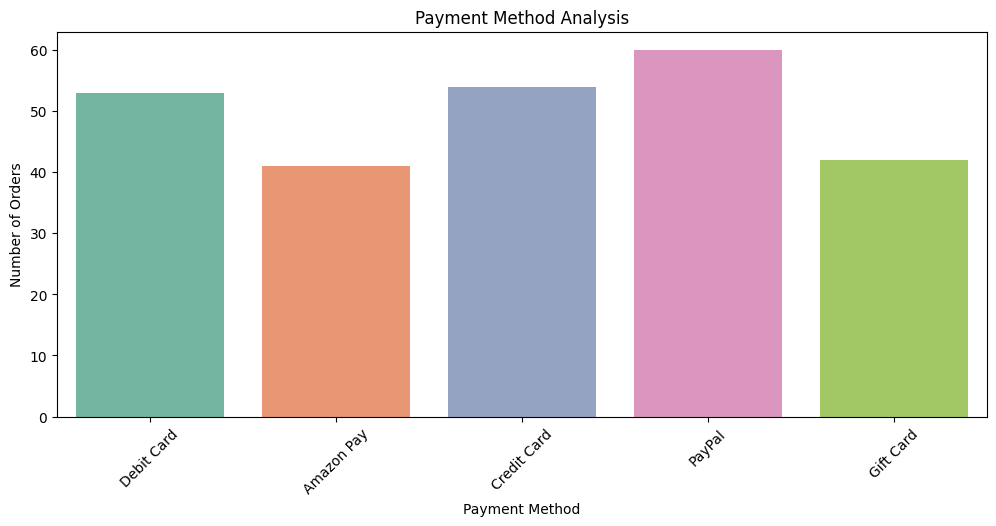

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Payment Method', data=df, palette='Set2')
plt.title('Payment Method Analysis')
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()
plt.savefig('Payment_method_analysis.png')

> From the analysis, we observe that PayPal is the most commonly used payment method among customers. In contrast, Amazon Pay and Gift Card are the least preferred options, indicating a strong customer preference for widely accepted digital payment platforms.

# Conclusion

Based on the analysis of Amazon sales data, it is evident that the Electronics category dominates online shopping in terms of both order count and total sales. Among electronics, Smartphones and Smartwatches emerged as the most trending products, followed closely by Headphones and Laptops.

In the Home Appliances category, Refrigerators stood out as the top-performing product, indicating strong customer demand for essential household items.

Furthermore, the analysis of payment methods revealed that digital payment systems, particularly PayPal, are more widely used by customers. 

# Business Suggestions Based on Sales Analysis

1. **Invest More in Electronics Marketing**
   
> Since Electronics is the highest-selling category, allocate more budget to promotions, deals, and featured listings for Smartphones and Smartwatches to maximize sales.

2.  **Boost Visibility of Home Appliances**

> Refrigerators perform well, indicating customer interest. Consider bundling offers, seasonal discounts, or highlighting them on landing pages to increase sales further in this category.

3.  **Optimize for Digital Payment Experience**

> Since most customers prefer PayPal and digital payment options, ensure a smooth and secure payment process. Minimize steps during checkout and offer incentives (e.g., cashback) for digital payments.

4.  **Target Ads by Product Trends**

> Focus ad campaigns around trending items like Smartphones and Refrigerators in high-order locations like Houston and Miami to maximize ROI.

5.  **Investigate Low-Performing Products & Payment Types**

> Review performance of products with low sales (e.g., some Books or Footwear) and underused payment options (like Amazon Pay). Consider repositioning, offering better deals, or removing underperformers from the catalog.

**Thank you for taking the time to view my project. I hope this analysis provided meaningful insights into customer behavior and sales trends in online shopping.**

**Feel free to leave feedback, suggestions, or fork the notebook if you found it useful. Your support and thoughts are truly appreciated as I continue learning and growing in the field of data analytics.**

**Happy Kaggling! 😊**